<ipython-input-4-a525c9891bb2>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')


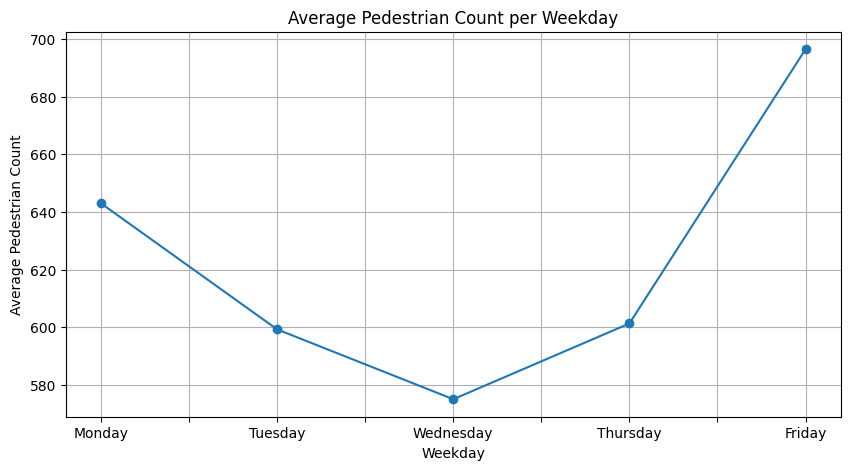

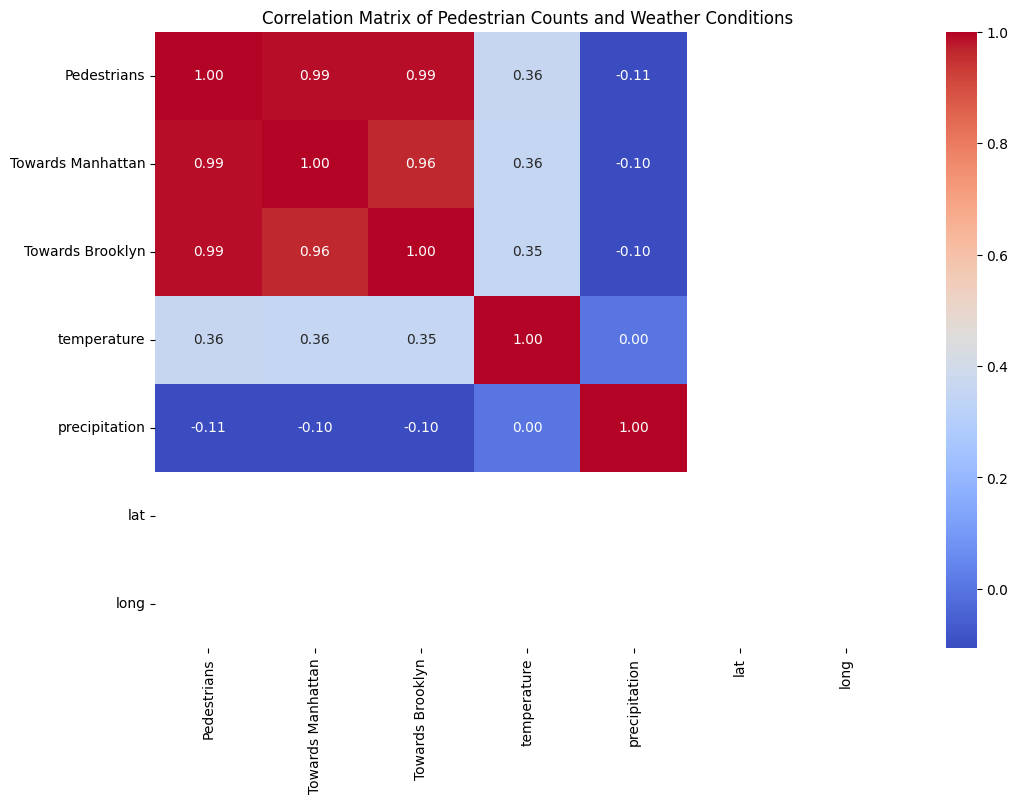

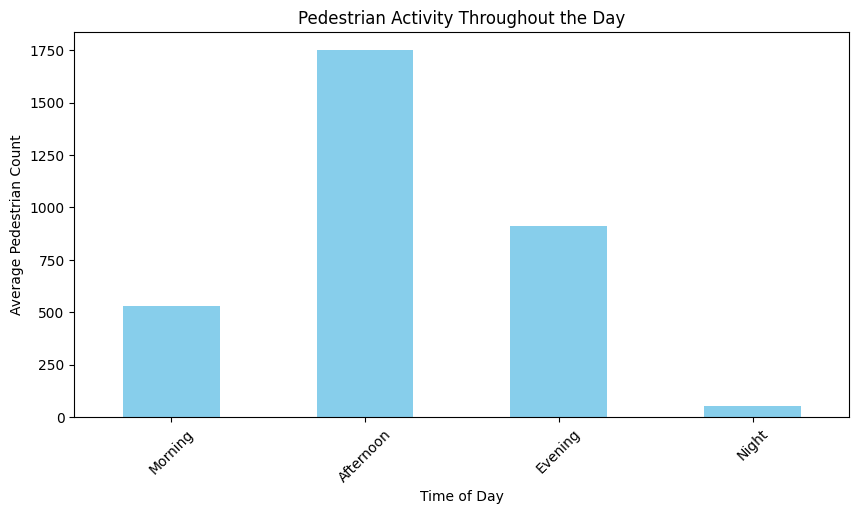

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)


df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')


df['Weekday'] = df['hour_beginning'].dt.day_name()

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
filtered_df = df[df['Weekday'].isin(weekdays)]


plt.figure(figsize=(10,5))
filtered_df.groupby('Weekday')['Pedestrians'].mean().reindex(weekdays).plot(marker='o')
plt.xlabel('Weekday')
plt.ylabel('Average Pedestrian Count')
plt.title('Average Pedestrian Count per Weekday')
plt.grid()
plt.show()


df_2019 = df[df['hour_beginning'].dt.year == 2019]


df_2019 = pd.get_dummies(df_2019, columns=['weather_summary'])


numeric_cols = df_2019.select_dtypes(include=['number'])


plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Pedestrian Counts and Weather Conditions')
plt.show()


def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'


df['Hour'] = df['hour_beginning'].dt.hour
df['Time of Day'] = df['Hour'].apply(categorize_time)


plt.figure(figsize=(10,5))
df.groupby('Time of Day')['Pedestrians'].mean().reindex(['Morning', 'Afternoon', 'Evening', 'Night']).plot(kind='bar', color='skyblue')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.title('Pedestrian Activity Throughout the Day')
plt.xticks(rotation=45)
plt.show()
